In [1]:
from obspy import read
from obspy.core.utcdatetime import UTCDateTime
import obspy
import obspy.signal
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

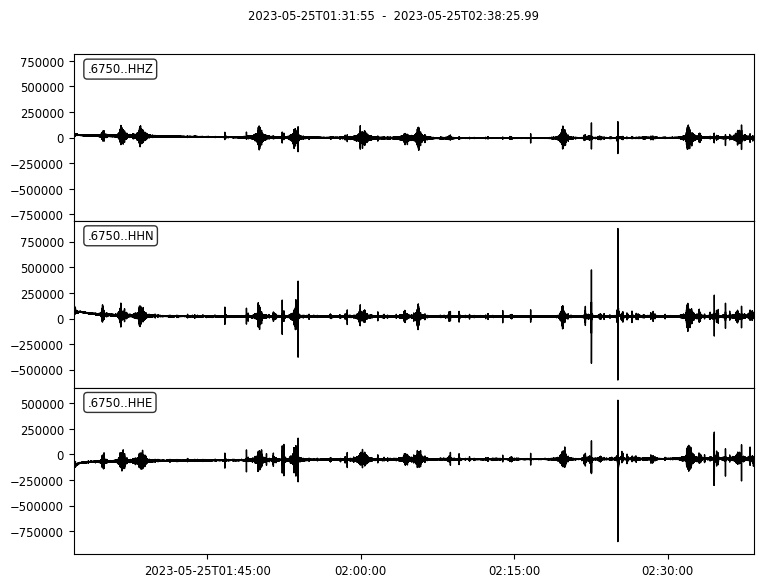

2023-05-25T01:31:55.000000Z


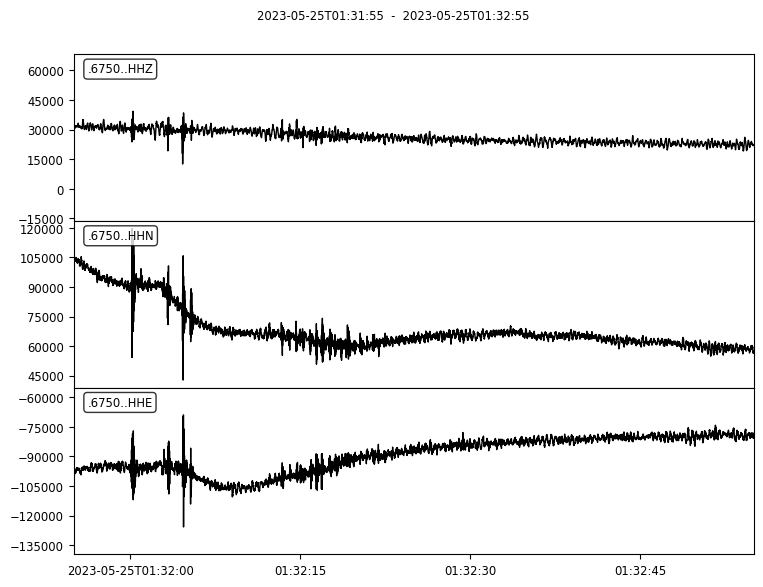

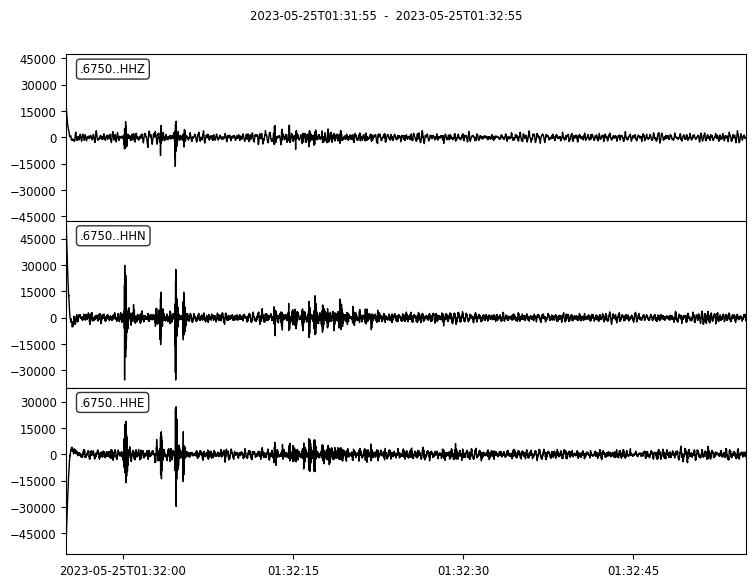

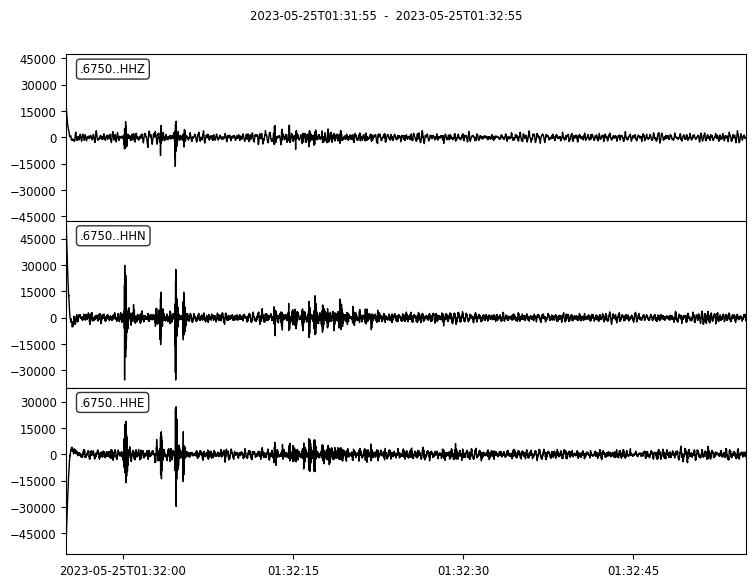

In [2]:
st = read('./PASSIVEDATA/STN10_E.msd')
st += read('./PASSIVEDATA/STN10_N.msd')
st += read('./PASSIVEDATA/STN10_Z.msd')

st.plot(size = (800,600))
tr = st[0]
stat = tr.stats
start =stat.starttime
print(start)
end = '2023-05-25T01:32:55.000000Z'
sts = st.slice(UTCDateTime(start), UTCDateTime(end))
sts.plot(size = (800,600))
sts.filter('highpass', freq=1.0, corners=2, zerophase=True)
sts.plot(size = (800,600))

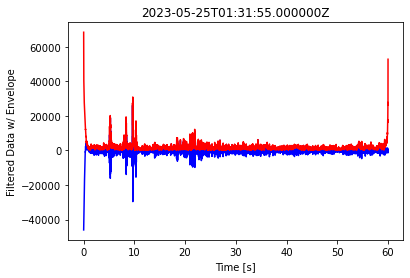

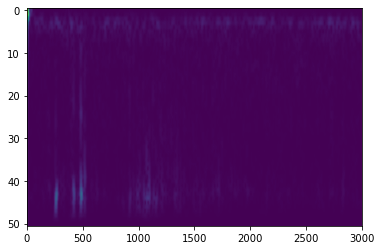

In [3]:
data_envelope = obspy.signal.filter.envelope(sts[0].data)

data = sts[0].data
npts = sts[0].stats.npts
samprate = sts[0].stats.sampling_rate

# The plotting, plain matplotlib
t = np.arange(0, npts / samprate, 1 / samprate)
plt.plot(t, sts[0].data, 'b')
plt.plot(t, data_envelope, 'r')
plt.title(st[0].stats.starttime)
plt.ylabel('Filtered Data w/ Envelope')
plt.xlabel('Time [s]')
plt.show()



nperseg = 101
noverlap = 99
fs = (sts[0].stats.sampling_rate)
dateZ = sts[0].times("timestamp")
f, t2, SPEC = signal.stft(sts[0].data, fs, nperseg=nperseg, noverlap=noverlap)
SPEC = np.abs(SPEC)

plt.imshow(SPEC, aspect='auto')
plt.show()